In [ ]:
#importing th libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
ds = pd.read_csv("/content/Heart Attack Data Set.csv")

Importing the dataset.It was taken from kaggle

In [ ]:
#EDA
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


the above cell displays the first five records in the dataset

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
ds['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

The abouve cell shows the counts of 1 and 0

In [ ]:
ds.shape

(303, 14)

In [ ]:
dict = {}
for i in list(ds.columns):
    dict[i] = ds[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [ ]:
ds['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [ ]:
ds_corr = ds.corr()
ds_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no null values in the dataset

#Exploratory Data Analysis

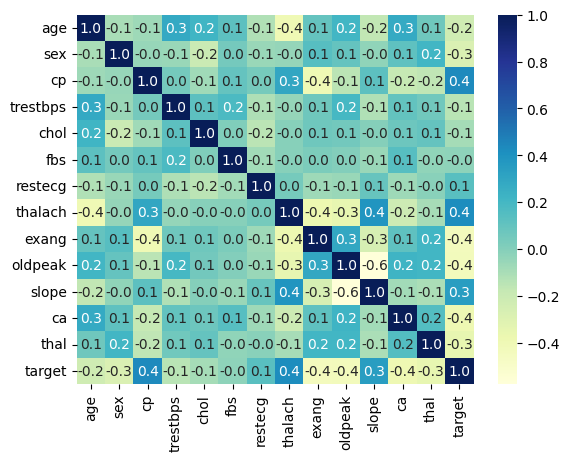

In [ ]:
#Data Visulaization
ds_cor =sns.heatmap(ds_corr,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

<Axes: xlabel='age', ylabel='Density'>

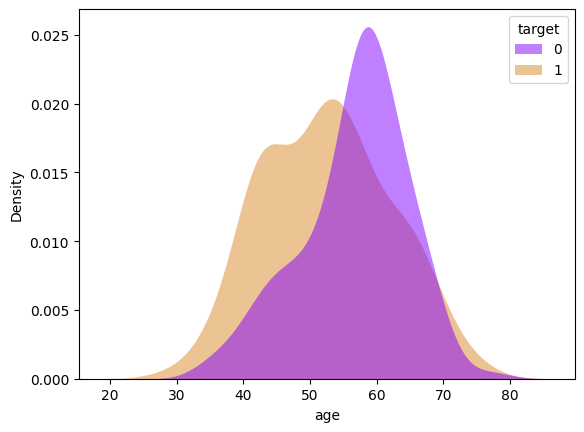

In [ ]:
sns.kdeplot(data=ds, x='age',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)


<Axes: xlabel='sex', ylabel='Density'>

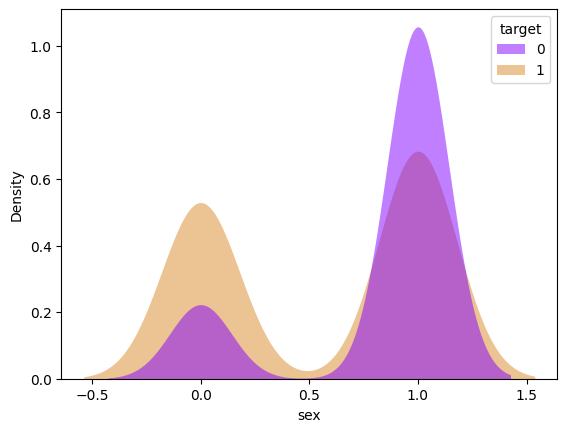

In [ ]:
sns.kdeplot(data=ds, x='sex',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)

<Axes: xlabel='sex', ylabel='count'>

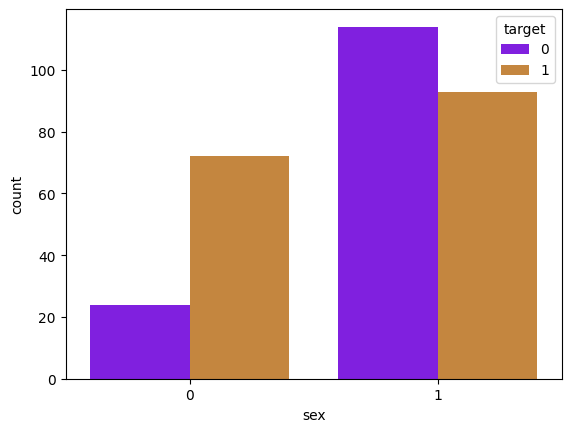

In [ ]:
sns.countplot(data=ds,x='sex',palette=["#8000ff","#da8829"], hue='target')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tabulate import tabulate

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def performance(x_train, x_test, y_train, y_test, classifier):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

def find_optimal_split_ratio(x, y, classifiers, splitting_ratios):
    optimal_ratio = None
    max_accuracy = 0.0
    header = ["Test Ratio", "Classifier", "Accuracy", "Precision", "Recall", "F1-score"]
    table_data = []
    for test_ratio in splitting_ratios:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state=42)
        for classifier_name, classifier in classifiers.items():
            accuracy, precision, recall, f1 = performance(x_train, x_test, y_train, y_test, classifier)
            row_data = [f"{test_ratio:.2f}", classifier_name,
                        f"{accuracy:.4f}", f"{precision:.4f}",
                        f"{recall:.4f}", f"{f1:.4f}"]
            table_data.append(row_data)
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                optimal_ratio = test_ratio
    print("\nOptimal Splitting Ratio:", optimal_ratio)
    print(tabulate(table_data, headers=header, tablefmt="grid"))

In [ ]:
#define classifiers

classifiers= {'Random Forest': RandomForestClassifier(),
              'Gradient Boosting': GradientBoostingClassifier(),
              'Support Vector Machine': SVC(),
              'Decision Tree': DecisionTreeClassifier(),
              'KNN': KNeighborsClassifier()
              }

In [ ]:
#Define Splitting ratios to evaluate

splitting_ratios = np.linspace(0.1, 0.9)

In [ ]:
#Find the optimal splitting ratio
import warnings
warnings.filterwarnings("ignore")

find_optimal_split_ratio(X, y, classifiers, splitting_ratios)


Optimal Splitting Ratio: 0.1979591836734694
+--------------+------------------------+------------+-------------+----------+------------+
|   Test Ratio | Classifier             |   Accuracy |   Precision |   Recall |   F1-score |
+==============+========================+============+=============+==========+============+
|         0.1  | Random Forest          |     0.7742 |      0.7739 |   0.7742 |     0.7732 |
+--------------+------------------------+------------+-------------+----------+------------+
|         0.1  | Gradient Boosting      |     0.7742 |      0.7767 |   0.7742 |     0.7747 |
+--------------+------------------------+------------+-------------+----------+------------+
|         0.1  | Support Vector Machine |     0.8065 |      0.8065 |   0.8065 |     0.8065 |
+--------------+------------------------+------------+-------------+----------+------------+
|         0.1  | Decision Tree          |     0.8065 |      0.8065 |   0.8065 |     0.8065 |
+--------------+---------

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#splitting the train and test data
X = ds.drop(['target'],axis=1)
y = ds[['target']]

splitting the dataset into X and y as independent and dependent variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 13)
The shape of X_test is        (61, 13)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


splitting training data and testing data

In [ ]:

# Creating a logistic regression model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

the above cell is for creating the model  for logistic regression

In [ ]:
# Making predictions on the test set
predictions = model.predict(X_test)
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


Here , the model predicts using the testing data

In [ ]:
#Evaluating the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

In [ ]:
#SVM

clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("Accuracy score of SVM is ", accuracy_score(y_test, y_pred))

Accuracy score of SVM is  0.8688524590163934


Using support vector machine model ,it predict the accuracy of the model with 0.8688

In [ ]:
y_pred = clf.predict([[50,1,2,130,245,0,1,145,0,2.2,0,0,2]])

In [ ]:
# Printing the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("Accuracy score of Logistic Regression is ", accuracy_score(y_test, y_pred))

Accuracy score of Logistic Regression is  0.8852459016393442


In [ ]:
#decision tree

dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("Accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

Accuracy score of Decision Tree is  0.7540983606557377


In [ ]:
#randon\m forest
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("Accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

Accuracy score of Random Forest is  0.7540983606557377


In [ ]:
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("Accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

Accuracy score of Gradient Boosting Classifier is  0.8688524590163934


In [ ]:
ds.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
